# Fraud Detection Model

A machine learning model to detect fraudulent transactions.Fraud detection is an important application of machine learning in the financial
services sector. The dataset used in this project is from Xente. The objective is to help Xente provide improved and safer service to its customers.

#### Library Importation

In [1]:
#Packages for data loading, data analysis, and data preparation
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
#Packages for model evaluation and classification models
from sklearn.model_selection import train_test_split, KFold,\
cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix,\
 accuracy_score
#Packages for deep learning models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier

#Packages for saving the model
from pickle import dump
from pickle import load


pd.set_option('display.max_columns', None)

%matplotlib inline
import warnings

In [2]:
# Reading in Dataset
Fraud = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\Github\Univelcity_Capstone\data\Xente Fraud Detection Challenge\dataset.csv")
Fraud.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


### Data Inspection 

In [3]:
Fraud.shape

(95662, 16)

In [4]:
Fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [6]:
Fraud.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


## Data Cleaning


In [5]:
# Check for missing values
missing_values = Fraud.isnull().sum()

# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(Fraud)) * 100

# Convert to a DataFrame and display as a table
missing_df = missing_values.to_frame(name="Missing Values")
missing_df["Percentage"] = missing_percentage
missing_df.style.format({"Percentage": "{:.2f}%"})

,Missing Values,Percentage
TransactionId,0,0.00%
BatchId,0,0.00%
AccountId,0,0.00%
SubscriptionId,0,0.00%
CustomerId,0,0.00%
CurrencyCode,0,0.00%
CountryCode,0,0.00%
ProviderId,0,0.00%
ProductId,0,0.00%
ProductCategory,0,0.00%


In [6]:
# Converting the TransactionStartTime to datetime
Fraud['TransactionStartTime'] = pd.to_datetime(Fraud['TransactionStartTime'])

## Exploratory Data Analysis(EDA)

In [7]:
class_names = {0:'Not Fraud', 1:'Fraud'}
print(Fraud.FraudResult.value_counts().rename(index = class_names))

Not Fraud    95469
Fraud          193
Name: FraudResult, dtype: int64


In [8]:
Fraud['CountryCode'].value_counts()

256    95662
Name: CountryCode, dtype: int64

In [9]:
""" 
Performs value count for each column of object type in a given data frame.
    
    Args:
    df (pd.DataFrame): The input dataframe.
    
    Returns:
    returns value counts of each column.
"""
def get_object_value_counts(df):
    object_columns = df.select_dtypes(include=['object']).columns
    value_counts = {}
    for column in object_columns:
        value_counts[column] = df[column].value_counts()
    return value_counts


object_value_counts = get_object_value_counts(Fraud)
object_value_counts

{'TransactionId': TransactionId_76871     1
 TransactionId_74922     1
 TransactionId_2737      1
 TransactionId_28101     1
 TransactionId_33267     1
                        ..
 TransactionId_32860     1
 TransactionId_139405    1
 TransactionId_65784     1
 TransactionId_8889      1
 TransactionId_35670     1
 Name: TransactionId, Length: 95662, dtype: int64,
 'BatchId': BatchId_67019     28
 BatchId_51870     16
 BatchId_113893    14
 BatchId_127204    12
 BatchId_116835    10
                   ..
 BatchId_23939      1
 BatchId_104215     1
 BatchId_116411     1
 BatchId_36631      1
 BatchId_29317      1
 Name: BatchId, Length: 94809, dtype: int64,
 'AccountId': AccountId_4841    30893
 AccountId_4249     4457
 AccountId_4840     1738
 AccountId_3206     1105
 AccountId_318      1070
                   ...  
 AccountId_4180        1
 AccountId_63          1
 AccountId_3497        1
 AccountId_2010        1
 AccountId_1685        1
 Name: AccountId, Length: 3633, dtype: int64,
 'S

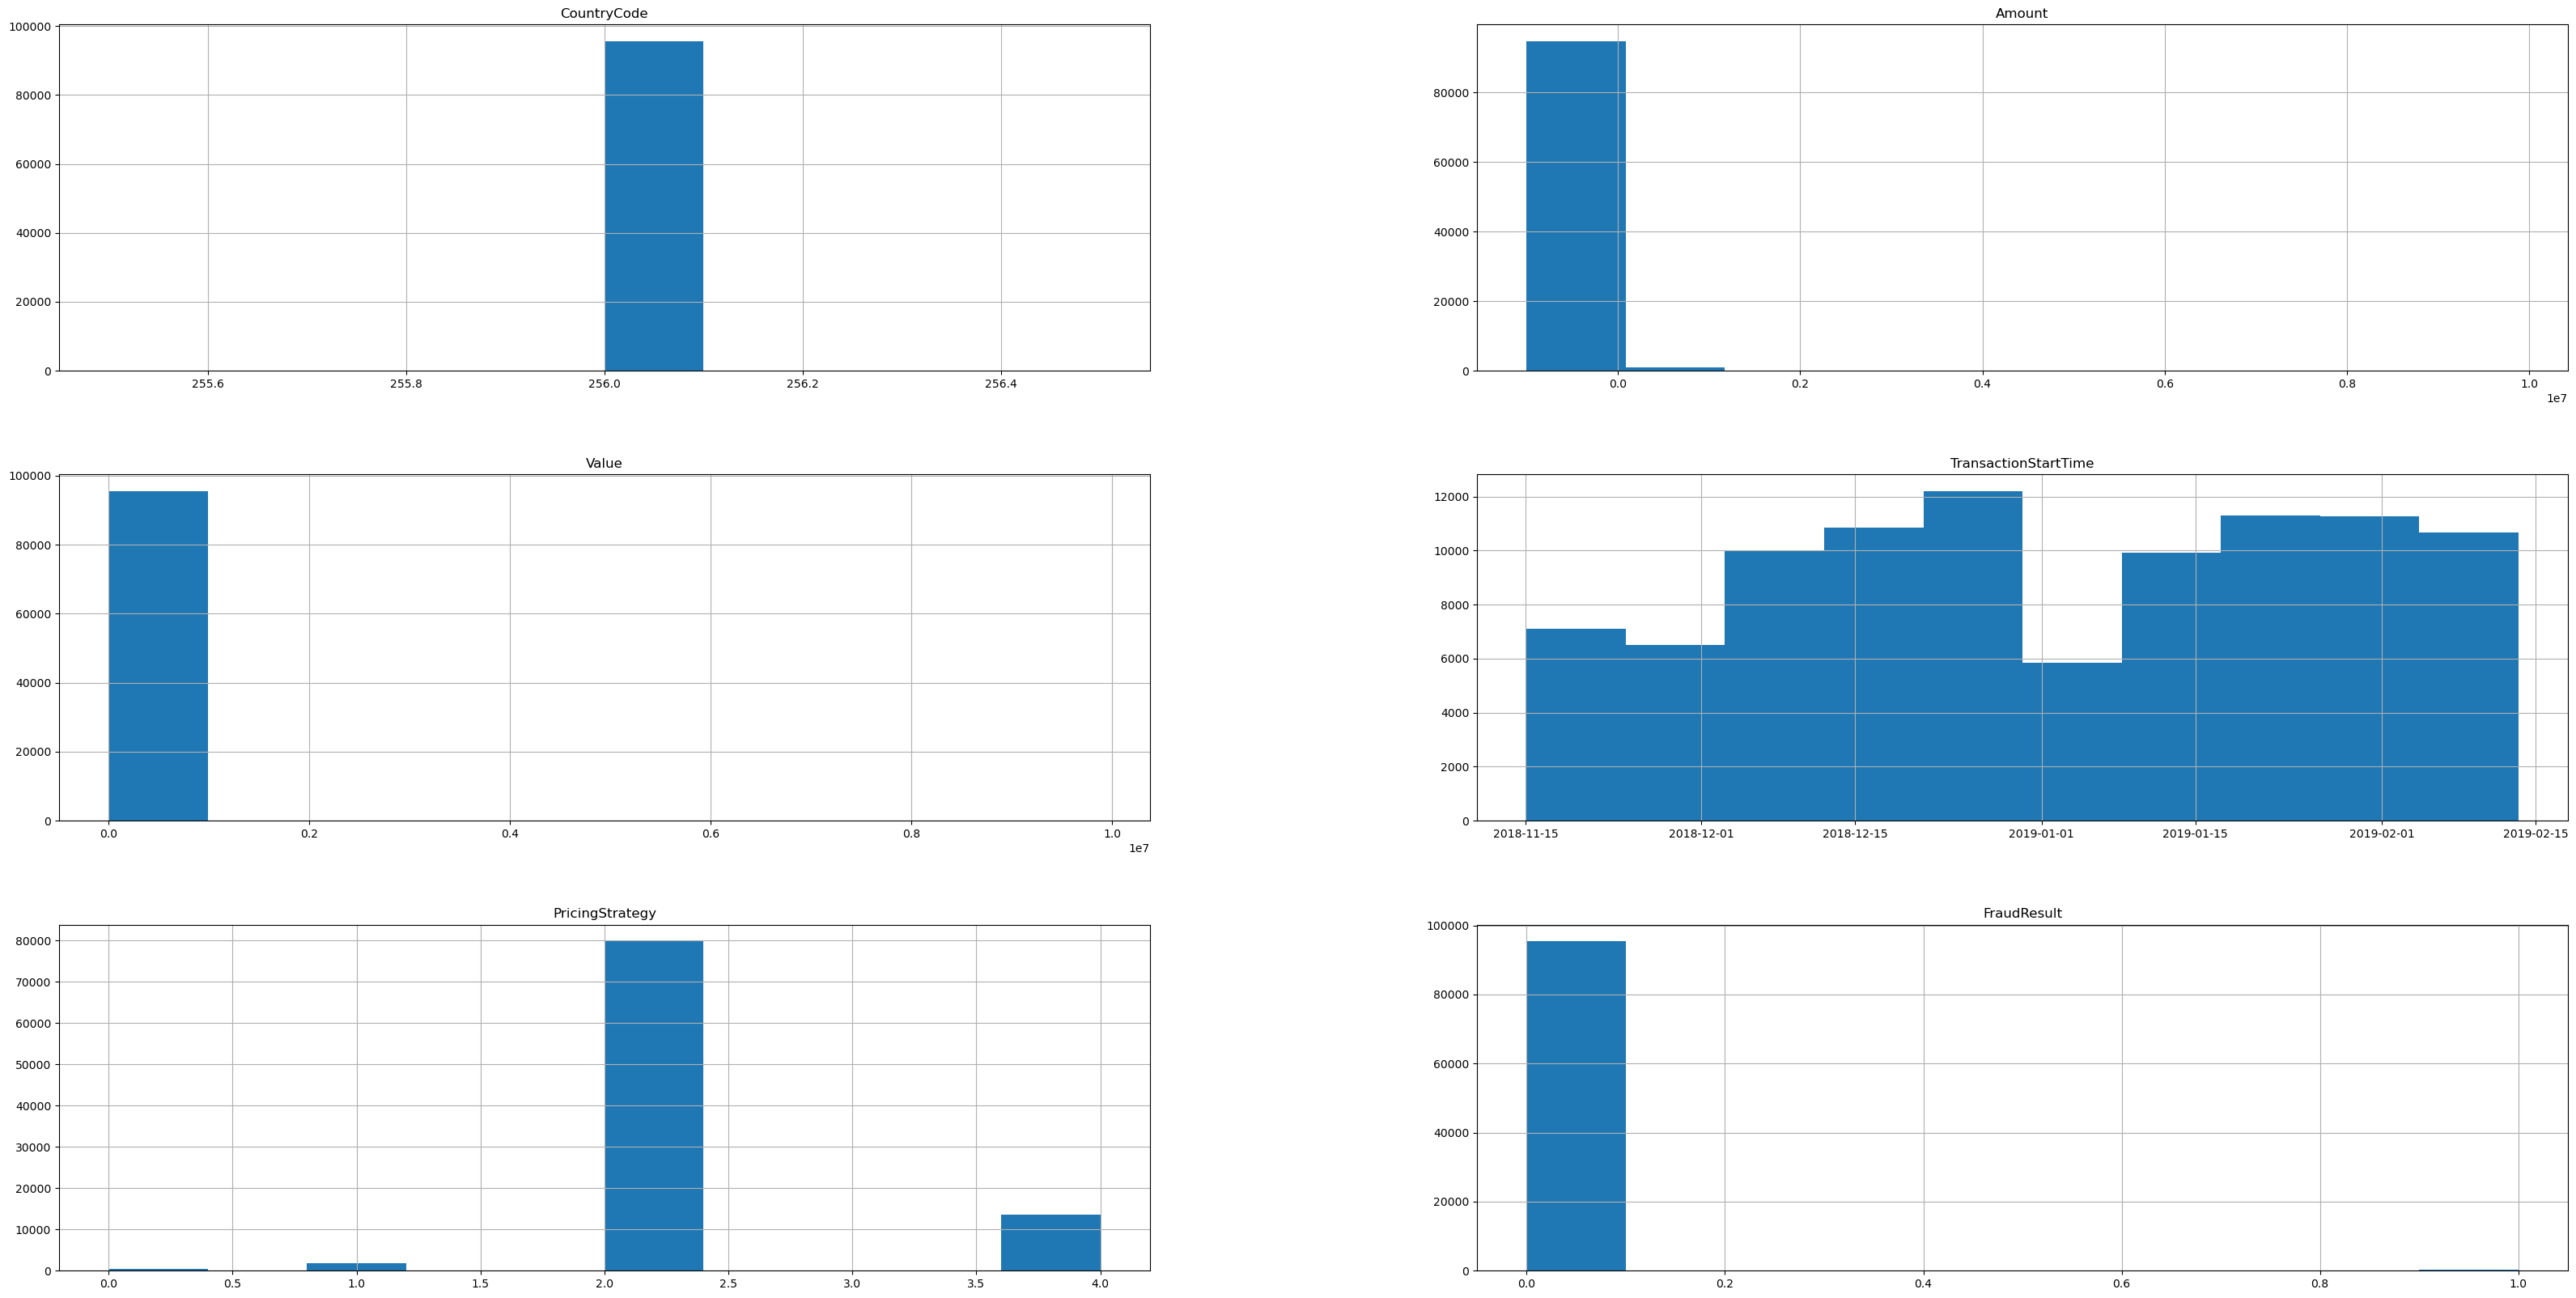

In [11]:
Fraud.hist(figsize=(40,20))
pyplot.show()

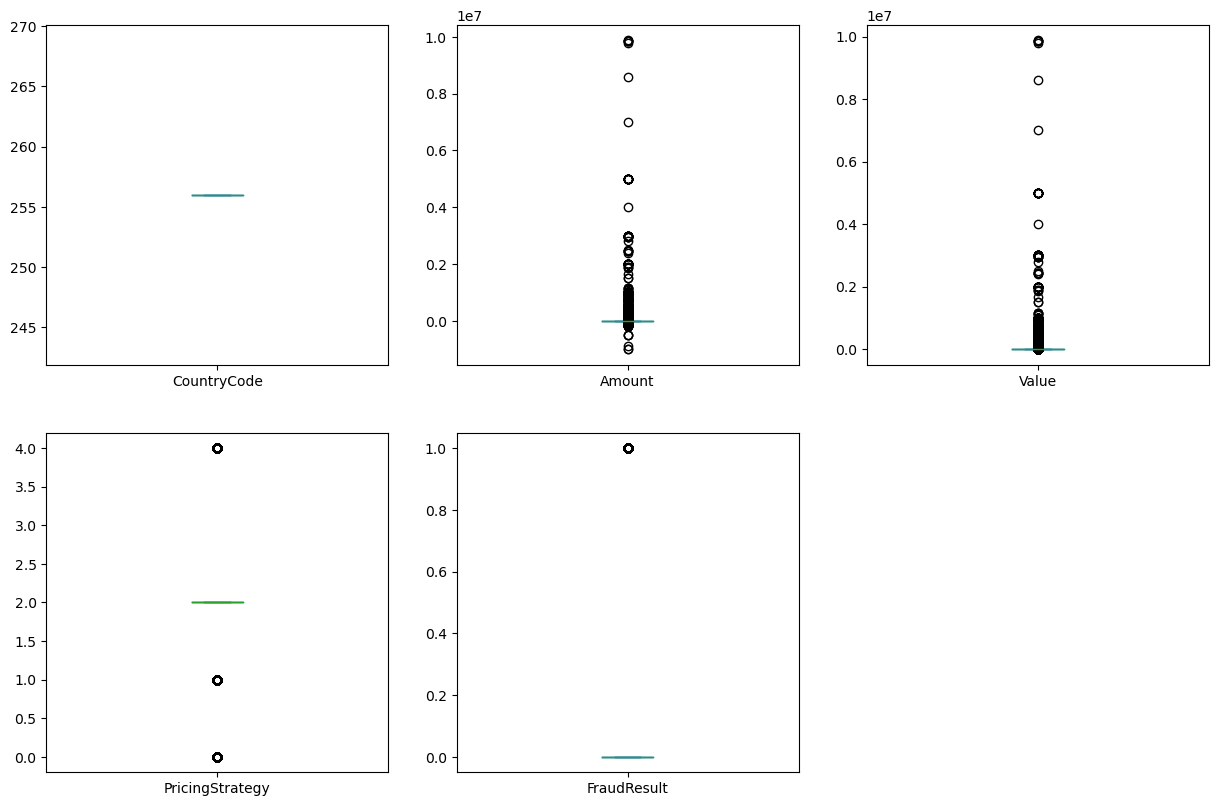

In [12]:
Fraud.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))
pyplot.show()

In [13]:
# Analysing Categorical variables.
Fraud[['TransactionId',
 'BatchId',
 'AccountId',
 'SubscriptionId',
 'CustomerId',
 'CurrencyCode',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'ChannelId']].describe()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935


## Feature Engineering

In [14]:

import pandas as pd

Fraud['weekday'] = Fraud['TransactionStartTime'].dt.weekday  # 0: Monday, 6: Sunday
Fraud['hour'] = Fraud['TransactionStartTime'].dt.hour
Fraud['month'] = Fraud['TransactionStartTime'].dt.month

In [15]:
Fraud.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,weekday,hour,month
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,3,2,11
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,3,2,11
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,3,2,11
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,3,3,11
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,3,3,11


In [35]:
# Copying Dataset.
fraud = Fraud.copy()
fraud = fraud.drop(['TransactionId', 'BatchId', 'SubscriptionId', 'CurrencyCode', 'CountryCode', 'TransactionStartTime'], axis=1)

In [36]:
fraud.head()

,AccountId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,weekday,hour,month
0,AccountId_3957,CustomerId_4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2,0,3,2,11
1,AccountId_4841,CustomerId_4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2,0,3,2,11
2,AccountId_4229,CustomerId_4683,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2,0,3,2,11
3,AccountId_648,CustomerId_988,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2,0,3,3,11
4,AccountId_4841,CustomerId_988,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2,0,3,3,11


#### Encoding Categorical Features

In [37]:
from sklearn.preprocessing import LabelEncoder
# Categorical boolean mask
categorical_feature_mask = fraud.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = fraud.columns[categorical_feature_mask].tolist()

categorical_cols

['AccountId',
 'CustomerId',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'ChannelId']

In [38]:
le = LabelEncoder()
# apply le on categorical feature columns
fraud[categorical_cols] = fraud[categorical_cols].apply(lambda col: le.fit_transform(col))
fraud[categorical_cols].head(10)

,AccountId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId
0,2490,2584,5,1,0,2
1,3219,2584,3,19,2,1
2,2713,2806,5,0,0,2
3,3351,3733,0,11,8,2
4,3219,3733,3,19,2,1
5,73,318,5,16,0,2
6,1187,1326,4,16,0,2
7,3219,1326,3,19,2,1
8,1433,3354,5,1,0,2
9,3399,36,0,6,2,2


In [39]:
fraud.head()

,AccountId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,weekday,hour,month
0,2490,2584,5,1,0,2,1000.0,1000,2,0,3,2,11
1,3219,2584,3,19,2,1,-20.0,20,2,0,3,2,11
2,2713,2806,5,0,0,2,500.0,500,2,0,3,2,11
3,3351,3733,0,11,8,2,20000.0,21800,2,0,3,3,11
4,3219,3733,3,19,2,1,-644.0,644,2,0,3,3,11


In [22]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95469 entries, 0 to 95661
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AccountId        95469 non-null  int32  
 1   CustomerId       95469 non-null  int32  
 2   ProviderId       95469 non-null  int32  
 3   ProductId        95469 non-null  int32  
 4   ProductCategory  95469 non-null  int32  
 5   ChannelId        95469 non-null  int32  
 6   Amount           95469 non-null  float64
 7   Value            95469 non-null  int64  
 8   PricingStrategy  95469 non-null  int64  
 9   FraudResult      95469 non-null  int64  
 10  weekday          95469 non-null  int64  
 11  hour             95469 non-null  int64  
 12  month            95469 non-null  int64  
dtypes: float64(1), int32(6), int64(6)
memory usage: 8.0 MB


In [40]:
# feature selection using the SelectKBest method with the chi2 scoring function
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(k=10)
bestfeatures
Y= fraud["FraudResult"]
X = fraud.loc[:, fraud.columns != 'FraudResult']
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

              Specs         Score
7             Value  45263.637610
6            Amount  43110.703592
2        ProviderId    258.740142
8   PricingStrategy    109.547413
3         ProductId    107.525562
4   ProductCategory     78.812015
5         ChannelId     73.744748
0         AccountId     12.450409
1        CustomerId     11.422675
11            month      7.554959


### Data Spliting and Data Preprocessing

In [41]:
# split out validation dataset for the end
Y= fraud["FraudResult"]
X = fraud.loc[:, fraud.columns != 'FraudResult']
validation_size = 0.3
seed = 42

# using the StandarScaler to scale my data
scaler = StandardScaler()
rescaled_X = scaler.fit_transform(X)



X_train, X_test, Y_train, Y_test = train_test_split(rescaled_X, Y, test_size=validation_size, random_state=seed, stratify=Y)       
print('X_train.shape=', X_train.shape, 'Y_train.shape=', Y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', Y_test.shape)
scoring = 'accuracy'

X_train.shape= (66963, 12) Y_train.shape= (66963,)
X_test.shape= (28699, 12) Y_test.shape= (28699,)


In [42]:
Y_train.value_counts()

0    66828
1      135
Name: FraudResult, dtype: int64

In [43]:
# test options for classification
num_folds = 10
seed = 7

In [44]:
# spot check some basic Classification algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# #Neural Network
models.append(('NN', MLPClassifier()))
# # #Ensable Models 
# # Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# # Bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

In [45]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
    try:
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    except ValueError as e:
        print(f"Error with model {name}: {e}")


LR: 0.998253 (0.000438)
LDA: 0.998342 (0.000425)
KNN: 0.999149 (0.000284)
CART: 0.999552 (0.000211)
NB: 0.995923 (0.000579)
SVM: 0.999328 (0.000243)
NN: 0.998970 (0.000226)
AB: 0.999477 (0.000167)
GBM: 0.999164 (0.000482)
RF: 0.999627 (0.000234)
ET: 0.999447 (0.000259)


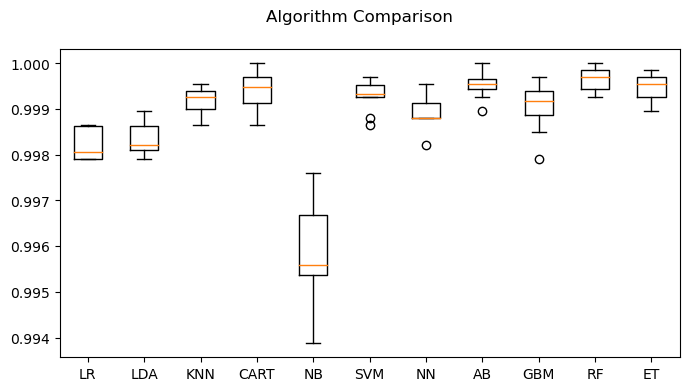

In [29]:
# compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
pyplot.show()

In [30]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [31]:
# estimate accuracy on validation set
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9995470225443395
[[28636     5]
 [    8    50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28641
           1       0.91      0.86      0.88        58

    accuracy                           1.00     28699
   macro avg       0.95      0.93      0.94     28699
weighted avg       1.00      1.00      1.00     28699



<Axes: xlabel='Predicted', ylabel='Actual'>

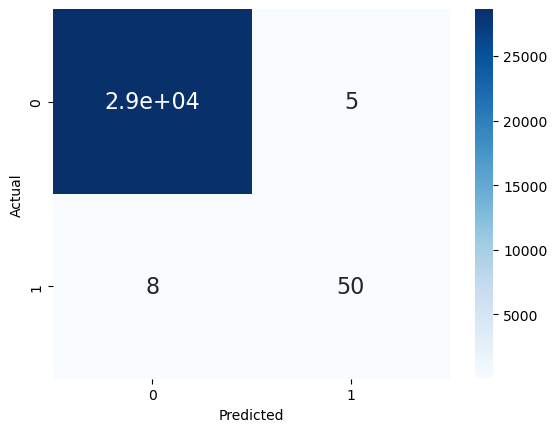

In [32]:
# Confusion_matrix
df_cm = pd.DataFrame(confusion_matrix(Y_test, predictions), columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [33]:
scoring_2 = 'recall'

results_2 = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results_2 = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring_2)
    results_2.append(cv_results_2)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results_2.mean(), cv_results_2.std())
    print(msg)

LR: 0.342805 (0.111227)
LDA: 0.456390 (0.150092)
KNN: 0.727253 (0.115440)
CART: 0.904367 (0.093437)
NB: 0.915943 (0.074616)
SVM: 0.744823 (0.070831)
NN: 0.765037 (0.092440)
AB: 0.852697 (0.085168)
GBM: 0.724872 (0.211829)
RF: 0.933922 (0.059377)
ET: 0.841055 (0.099950)


In [34]:
model_2 = RandomForestClassifier()
model_2.fit(X_train, Y_train)

RandomForestClassifier()

In [35]:
predictions_2 = model_2.predict(X_test)
print(accuracy_score(Y_test, predictions_2))
print(confusion_matrix(Y_test, predictions_2))
print(classification_report(Y_test, predictions_2))

0.9995121781246733
[[28635     6]
 [    8    50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28641
           1       0.89      0.86      0.88        58

    accuracy                           1.00     28699
   macro avg       0.95      0.93      0.94     28699
weighted avg       1.00      1.00      1.00     28699



In [36]:
Y_train.head()

18178    0
81353    0
31115    0
21634    0
10517    0
Name: FraudResult, dtype: int64

### Dealing with Data Imbalance

In [37]:
# Undersampling dataset
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, Y_train)

In [38]:
y_train_resampled.value_counts()

0    135
1    135
Name: FraudResult, dtype: int64

In [39]:
# Oversampling Dataset 
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_Ovresampled, y_train_Ovresampled = ros.fit_resample(X_train, Y_train)


In [40]:
y_train_Ovresampled.value_counts()

0    66828
1    66828
Name: FraudResult, dtype: int64

In [41]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#Neural Network
models.append(('NN', MLPClassifier()))
# #Ensable Models 
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))


def create_model(neurons=12, activation='relu', learn_rate = 0.01, momentum=0):
 # create model
 model = Sequential()
 model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], \
 activation=activation))
 model.add(Dense(32,activation=activation))
 model.add(Dense(1, activation='sigmoid'))
 # Compile model
 optimizer = SGD(lr=learn_rate, momentum=momentum)
 model.compile(loss='binary_crossentropy', optimizer='adam', \
 metrics=['accuracy'])
 return model
models.append(('DNN', KerasClassifier(build_fn=create_model,\
epochs=50, batch_size=10, verbose=0)))

C:\Users\HP\AppData\Local\Temp\ipykernel_23508\1035785302.py:32: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  models.append(('DNN', KerasClassifier(build_fn=create_model,\


In [42]:
# using Undersample data
results_3 = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results_3 = cross_val_score(model, X_train_resampled, y_train_resampled, cv=kfold, scoring=scoring)
    results_3.append(cv_results_3)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results_3.mean(), cv_results_3.std())
    print(msg)

LR: 0.985185 (0.029630)
LDA: 0.896296 (0.046259)
KNN: 0.970370 (0.027716)
CART: 0.977778 (0.037771)
NB: 0.974074 (0.028927)
SVM: 0.937037 (0.057497)


c:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

NN: 0.988889 (0.023715)
AB: 0.981481 (0.029860)
GBM: 0.974074 (0.037222)
RF: 0.985185 (0.024568)
ET: 0.981481 (0.029860)


c:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 258ms/step


c:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 172ms/step


c:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 170ms/step


c:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 168ms/step


c:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 179ms/step


c:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 161ms/step


c:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 174ms/step


c:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 151ms/step


c:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 200ms/step


c:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 197ms/step
DNN: 0.985185 (0.024568)


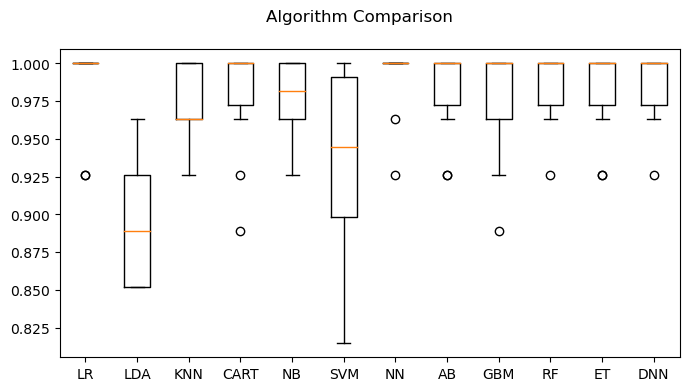

In [43]:
# compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results_3)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
pyplot.show()

In [44]:
#results_2 = []
#names = [] 
#for name, model in models:
#    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)  
#    cv_results_2 = cross_val_score(model, X_train_Ovresampled, y_train_Ovresampled, cv=kfold, scoring=scoring)
#    results.append(cv_results_2)
#    names.append(name)
#    msg = "%s: %f (%f)" % (name, cv_results_2.mean(), cv_results_2.std())
#    print(msg)

In [46]:
'''
hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
    The ith element represents the number of neurons in the ith
    hidden layer.
'''
param_grid={'hidden_layer_sizes': [(20,), (50,), (20,20), (20, 30, 20)]}
model = MLPClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_resampled, y_train_resampled)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

c:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

Best: 0.988889 using {'hidden_layer_sizes': (20, 20)}
0.981481 (0.024845) with: {'hidden_layer_sizes': (20,)}
0.981481 (0.029860) with: {'hidden_layer_sizes': (50,)}
0.988889 (0.023715) with: {'hidden_layer_sizes': (20, 20)}
0.977778 (0.037771) with: {'hidden_layer_sizes': (20, 30, 20)}


c:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [47]:
model_3 = MLPClassifier(hidden_layer_sizes=(20, 20))
model_3.fit(X_train_resampled, y_train_resampled)

c:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(20, 20))

In [50]:
# estimate accuracy on Original validation set
predictions_3 = model_3.predict(X_test)
print(accuracy_score(Y_test, predictions_3))
print(confusion_matrix(Y_test, predictions_3))
print(classification_report(Y_test, predictions_3))

0.9900693403951357
[[28358   283]
 [    2    56]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     28641
           1       0.17      0.97      0.28        58

    accuracy                           0.99     28699
   macro avg       0.58      0.98      0.64     28699
weighted avg       1.00      0.99      0.99     28699



<Axes: xlabel='Predicted', ylabel='Actual'>

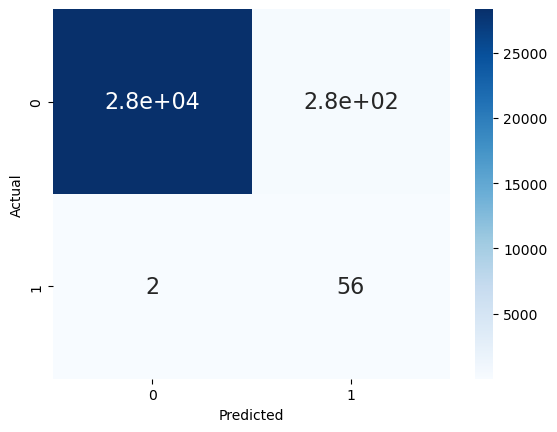

In [49]:
df_cm = pd.DataFrame(confusion_matrix(Y_test, predictions_3), columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [51]:
# Save Model Using Pickle
from pickle import dump
from pickle import load
# save the model to disk
filename = 'finalized_model.sav'
dump(model_3, open(filename, 'wb'))